In [1]:
from pathlib import Path
import torch
import numpy as np 
import imgaug 
import imgaug.augmenters 
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import glob
import os

In [9]:
class CardiacDataset(torch.utils.data.Dataset):
    def __init__(self, root, augment_params):
        # Ensure root is a Path object
        self.root = Path(root) if isinstance(root, str) else root
        self.all_files = self.extract_files(self.root)
        self.augment_params = augment_params

    @staticmethod
    def extract_files(root):
        files = []
        # Iterate over subjects in the root directory
        for subject in root.glob("*"):
            slice_path = subject / "data"  # Get the slices for the current subject
            for slice in slice_path.glob("*.npy"):
                files.append(slice)
        return files

    @staticmethod
    def change_img_to_label_path(path):
        parts = list(path.parts)
        parts[parts.index("data")] = "masks"
        return Path(*parts)

    def augment(self, slice, mask):
        # Fix for https://discuss.pytorch.org/t/dataloader-workers-generate-the-same-random-augmentations/28830/2,
        random_seed = torch.randint(0, 1000000, (1,)).item()
        imgaug.seed(random_seed)
        mask = SegmentationMapsOnImage(mask, mask.shape)
        slice_aug, mask_aug = self.augment_params(image=slice, segmentation_maps=mask)
        mask_aug = mask_aug.get_arr()
        return slice_aug, mask_aug

    def __len__(self):
        #Return the length of the dataset (length of all files)
        return len(self.all_files)

    def __getitem__(self, idx):
        print(self.all_files)
        file_path = self.all_files[idx]
        mask_path = self.change_img_to_label_path(file_path)
        slice = np.load(file_path).astype(np.float32)  # Convert to float for torch,
        mask = np.load(mask_path)
        if self.augment_params:
          slice, mask = self.augment(slice, mask)
      # Note that pytorch expects the input of shape BxCxHxW, where B corresponds to the batch size, C to the channels, H to the height and W to Width.,
      # As our data is of shape (HxW) we need to manually add the C axis by using expand_dims.,
        return np.expand_dims(slice, 0), np.expand_dims(mask, 0)


In [10]:
# List the content of the root directory to check if the files exist
from pathlib import Path

root_path = Path(r"C:\Users\hp\Desktop\Medical image analysis\Atrium_segmentation\Preprocessed")
print(list(root_path.glob("*")))  # This should print all the folders (subjects)


[WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/val')]


1932
[WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/0/data/0.npy'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/0/data/1.npy'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/0/data/10.npy'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/0/data/100.npy'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/0/data/101.npy'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/0/data/102.npy'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/0/data/103.npy'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/0/data/104.npy'), WindowsPath('C:/Users/hp/Desktop/Medical image analysis/Atrium_segmentation/Preprocessed/train/

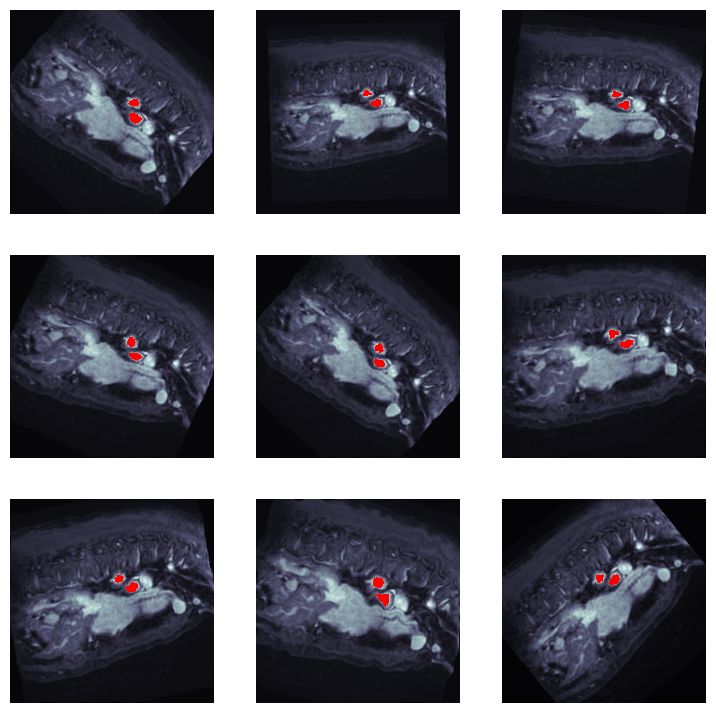

In [11]:
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa

seq = iaa.Sequential([
iaa.Affine(scale=(0.85, 1.15), # Zoom in or out,
rotate=(-45, 45)),  # Rotate up to 45 degrees,
iaa.ElasticTransformation()])  # Random Elastic Deformations,

# Create the dataset object
path = r"C:\Users\hp\Desktop\Medical image analysis\Atrium_segmentation\Preprocessed\train"
dataset = CardiacDataset(path, seq)
print(len(dataset))
fig, axis = plt.subplots(3, 3, figsize=(9, 9))
for i in range(3):
    for j in range(3):
        slice, mask = dataset[3]
        mask_ = np.ma.masked_where(mask==0, mask) #mask all pixels that are 0 in segmentation mask
        axis[i][j].imshow(slice[0], cmap='bone')
        axis[i][j].imshow(mask_[0], cmap='autumn')
        axis[i][j].axis('off')

In [22]:
# Assuming the previous context is a part of a Jupyter Notebook cell
fig.suptitle("Sample augmentations")
plt.tight_layout()


{
  "cells": [
    {
      "cell_type": "markdown",
      "id": "victorian-affair",
      "metadata": {},
      "source": [
        "Nice!",
        "With the above dataset, we can finally create the model and train the AtriumSegmenter."
      ]
    }
  ],
  "metadata": {
    "kernelspec": {
      "display_name": "Python 3 (ipykernel)",
      "language": "python",
      "name": "python3"
    },
    "language_info": {
      "codemirror_mode": {
        "name": "ipython",
        "version": 3
      },
      "file_extension": ".py",
      "mimetype": "text/x-python",
      "name": "python",
      "nbconvert_exporter": "python",
      "pygments_lexer": "ipython3",
      "version": "3.8.0"
    }
  },
  "nbformat": 4,
  "nbformat_minor": 5
}


{'cells': [{'cell_type': 'markdown',
   'id': 'victorian-affair',
   'metadata': {},
   'source': ['Nice!',
    'With the above dataset, we can finally create the model and train the AtriumSegmenter.']}],
 'metadata': {'kernelspec': {'display_name': 'Python 3 (ipykernel)',
   'language': 'python',
   'name': 'python3'},
  'language_info': {'codemirror_mode': {'name': 'ipython', 'version': 3},
   'file_extension': '.py',
   'mimetype': 'text/x-python',
   'name': 'python',
   'nbconvert_exporter': 'python',
   'pygments_lexer': 'ipython3',
   'version': '3.8.0'}},
 'nbformat': 4,
 'nbformat_minor': 5}

<Figure size 640x480 with 0 Axes>